Dataset Overview:
Shape: (211224, 16)
Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3

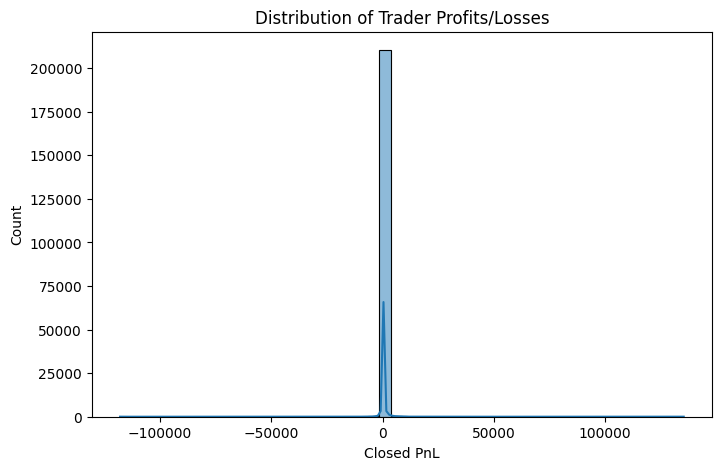

OSError: Cannot save file into a non-existent directory: 'csv_files'

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\MOHAMMED SOHAIL\Downloads\historical_data.csv")
print("Dataset Overview:")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())


print("\nSummary Statistics:\n", df.describe(include="all"))
plt.figure(figsize=(8,5))
sns.histplot(df['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Trader Profits/Losses")
plt.xlabel("Closed PnL")
plt.ylabel("Count")
plt.savefig("outputs/trader_closedPnL_distribution.png")
plt.show()

# ---- Leverage Distribution ----
if "leverage" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['leverage'], bins=30, kde=False)
    plt.title("Leverage Distribution")
    plt.xlabel("Leverage")
    plt.ylabel("Count")
    plt.savefig("outputs/trader_leverage_distribution.png")
    plt.show()

# ---- Trade Size vs Profitability ----
if "size" in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="size", y="closedPnL", data=df, alpha=0.5)
    plt.title("Trade Size vs Profitability")
    plt.xlabel("Trade Size")
    plt.ylabel("Closed PnL")
    plt.savefig("outputs/trade_size_vs_pnl.png")
    plt.show()

# ---- Side (Buy/Sell) Analysis ----
if "side" in df.columns:
    side_counts = df['side'].value_counts()
    print("\nTrade Sides:\n", side_counts)
    plt.figure(figsize=(6,5))
    sns.countplot(x="side", data=df, palette="Set2")
    plt.title("Buy vs Sell Trades")
    plt.savefig("outputs/trade_side_counts.png")
    plt.show()

# ---- Save Processed CSV ----
df.to_csv("csv_files/trader_data_processed.csv", index=False)

print("✅ Trader Data EDA Completed. Graphs saved in 'outputs/' and processed CSV in 'csv_files/'.")
